<a href="https://colab.research.google.com/github/onmax/bike-forecasting/blob/main/src/models/one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/onmax/bike-forecasting/
%cd bike-forecasting/src/models

In [2]:
!pip3 install tensorflow keras livelossplot tensorboard pandas >> /dev/null

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [7]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import sys

sys.path.insert(1, '../../preprocessing/')
sys.path.insert(1, '../../graphs/')
sys.path.insert(1, '..')
from window import WindowGenerator
from model_lib import compile_and_fit, model_generator
from dataset_lib import load_dataset, split_dataset
from lr import lr_timeline
# from predictions import plot_predictions


In [16]:
model_generator("lstm", lr=10e-3)

Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-3
Training from 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Validating from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Testing from 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Epoch 1/150


ValueError: in user code:

    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:386 call
        outputs = layer(inputs, **kwargs)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:659 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/max/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer lstm_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 128]


In [8]:
df = load_dataset("/..")

Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-3


In [9]:
train_df, val_df = split_dataset(df, train_from=datetime(2018, 1, 1))

Training from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Validating from 2019-01-01 00:00:00 to 2019-12-31 23:00:00


In [10]:
train_df

,quantity_1,quantity_100,quantity_101,quantity_102,quantity_103,quantity_106,quantity_107,quantity_108,quantity_109,quantity_11,...,quantity_93,quantity_94,quantity_95,quantity_96,quantity_97,quantity_98,quantity_99,hour,day_of_week,month
start_time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1
2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,1,1
2018-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1
2018-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,1
2018-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19,1,12
2018-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,12
2018-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,1,12


# OUT_STEPS = 1

In [17]:
OUT_STEPS = 1
window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               train_df=train_df, val_df=val_df)
num_features = len(window.label_columns)


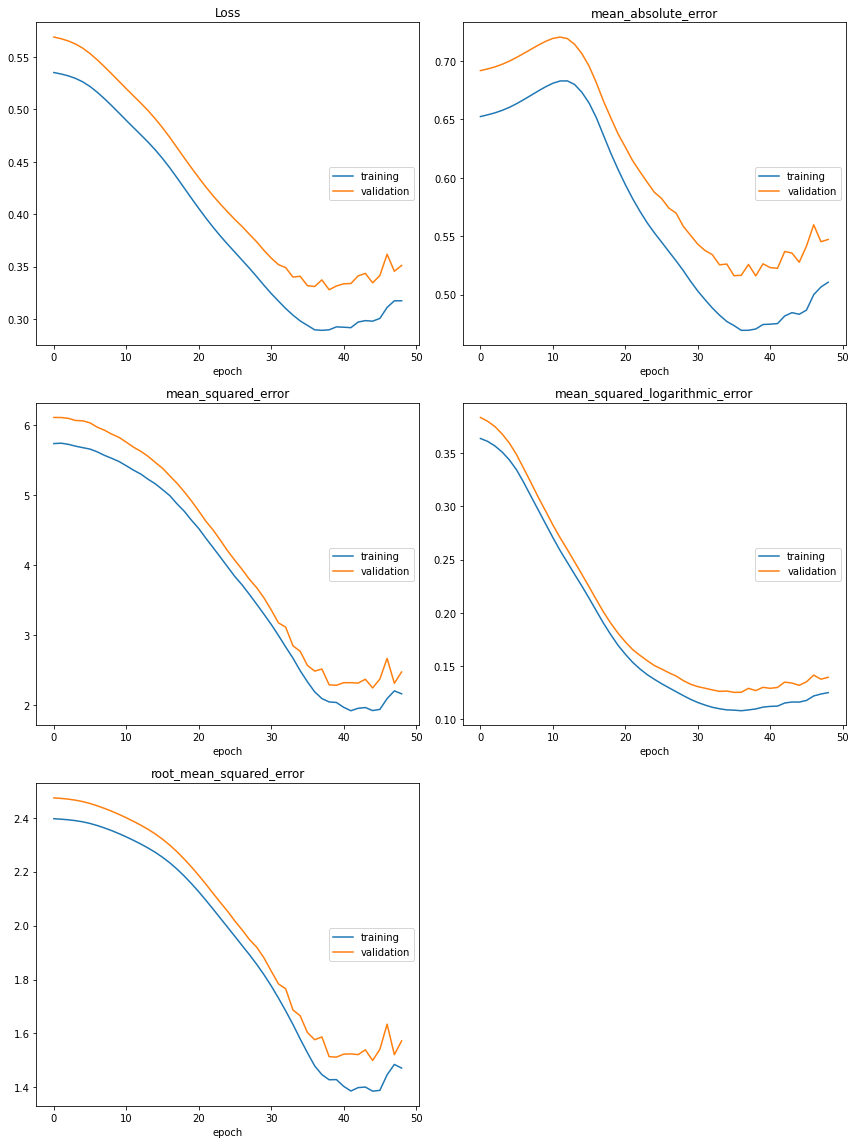

Loss
	training         	 (min:    0.289, max:    0.535, cur:    0.318)
	validation       	 (min:    0.328, max:    0.569, cur:    0.351)
mean_absolute_error
	training         	 (min:    0.469, max:    0.683, cur:    0.511)
	validation       	 (min:    0.516, max:    0.720, cur:    0.547)
mean_squared_error
	training         	 (min:    1.920, max:    5.742, cur:    2.162)
	validation       	 (min:    2.246, max:    6.110, cur:    2.474)
mean_squared_logarithmic_error
	training         	 (min:    0.108, max:    0.364, cur:    0.125)
	validation       	 (min:    0.125, max:    0.384, cur:    0.139)
root_mean_squared_error
	training         	 (min:    1.386, max:    2.396, cur:    1.472)
	validation       	 (min:    1.500, max:    2.474, cur:    1.573)
137/137 - 12s - loss: 0.3175 - mean_squared_logarithmic_error: 0.1250 - mean_squared_error: 2.1619 - mean_absolute_error: 0.5105 - root_mean_squared_error: 1.4716 - val_loss: 0.3512 - val_mean_squared_logarithmic_error: 0.1394 - val_mean_squ

In [19]:
model = tf.keras.Sequential([
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
    Reshape([OUT_STEPS, num_features])
])
history = compile_and_fit(model, window, should_stop=True, max_epochs=100, lr_schedule_fn=(lambda epoch: 1e-6 * 10**(epoch/10)))

In [1]:
lr_timeline(history, [1e-6, 1e-1, 0, 0.5]) 

NameError: name 'lr_timeline' is not defined

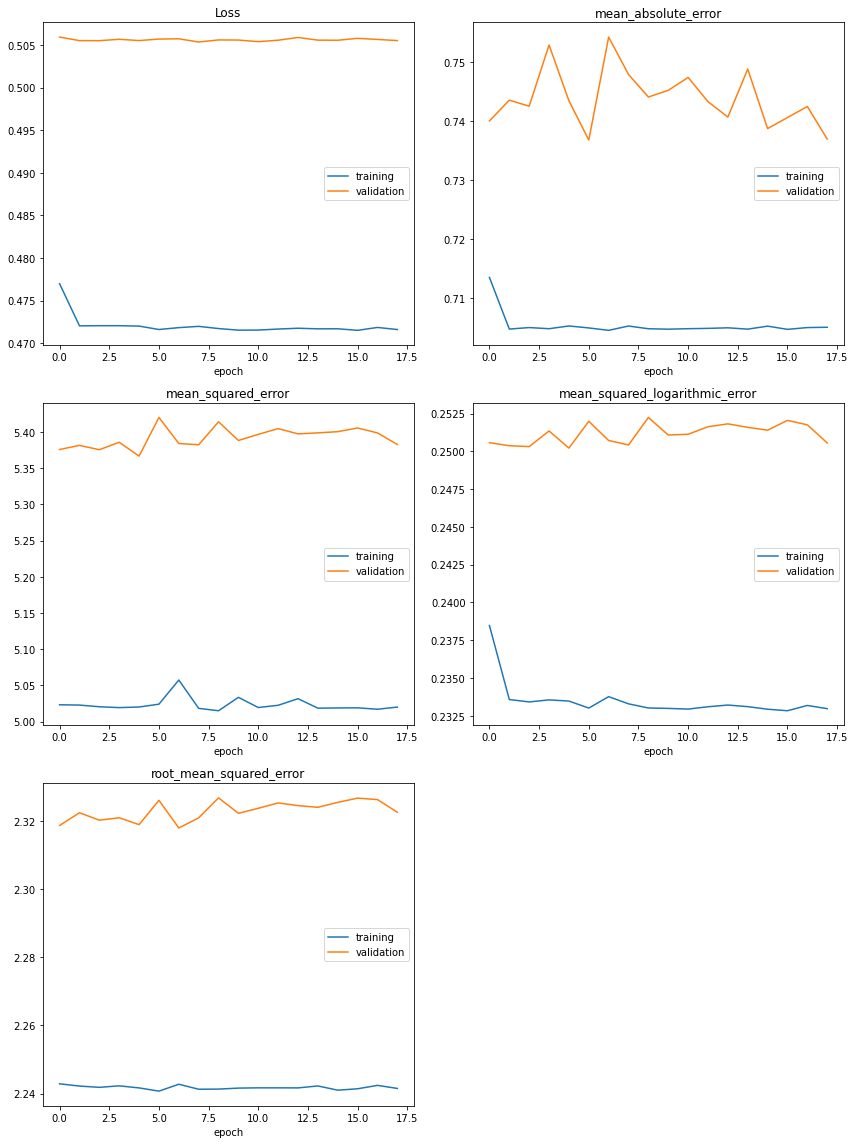

Loss
	training         	 (min:    0.472, max:    0.477, cur:    0.472)
	validation       	 (min:    0.505, max:    0.506, cur:    0.506)
mean_absolute_error
	training         	 (min:    0.705, max:    0.714, cur:    0.705)
	validation       	 (min:    0.737, max:    0.754, cur:    0.737)
mean_squared_error
	training         	 (min:    5.015, max:    5.058, cur:    5.020)
	validation       	 (min:    5.367, max:    5.420, cur:    5.383)
mean_squared_logarithmic_error
	training         	 (min:    0.233, max:    0.238, cur:    0.233)
	validation       	 (min:    0.250, max:    0.252, cur:    0.251)
root_mean_squared_error
	training         	 (min:    2.241, max:    2.243, cur:    2.242)
	validation       	 (min:    2.318, max:    2.327, cur:    2.323)
137/137 - 47s - loss: 0.4716 - mean_squared_logarithmic_error: 0.2330 - mean_squared_error: 5.0202 - mean_absolute_error: 0.7051 - root_mean_squared_error: 2.2415 - val_loss: 0.5055 - val_mean_squared_logarithmic_error: 0.2506 - val_mean_squ

In [24]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    LSTM(633, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
    Reshape([OUT_STEPS, num_features])
])
history = compile_and_fit(model, window, lr=0.005, should_stop=True, max_epochs=100, tensorboard=True)

In [13]:
plot_predictions(window, model, 10)

ValueError: x and y must be the same size

# OUT_STEPS = 3

In [15]:
OUT_STEPS = 3
window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               train_df=train_df, val_df=val_df)
num_features = len(window.label_columns)


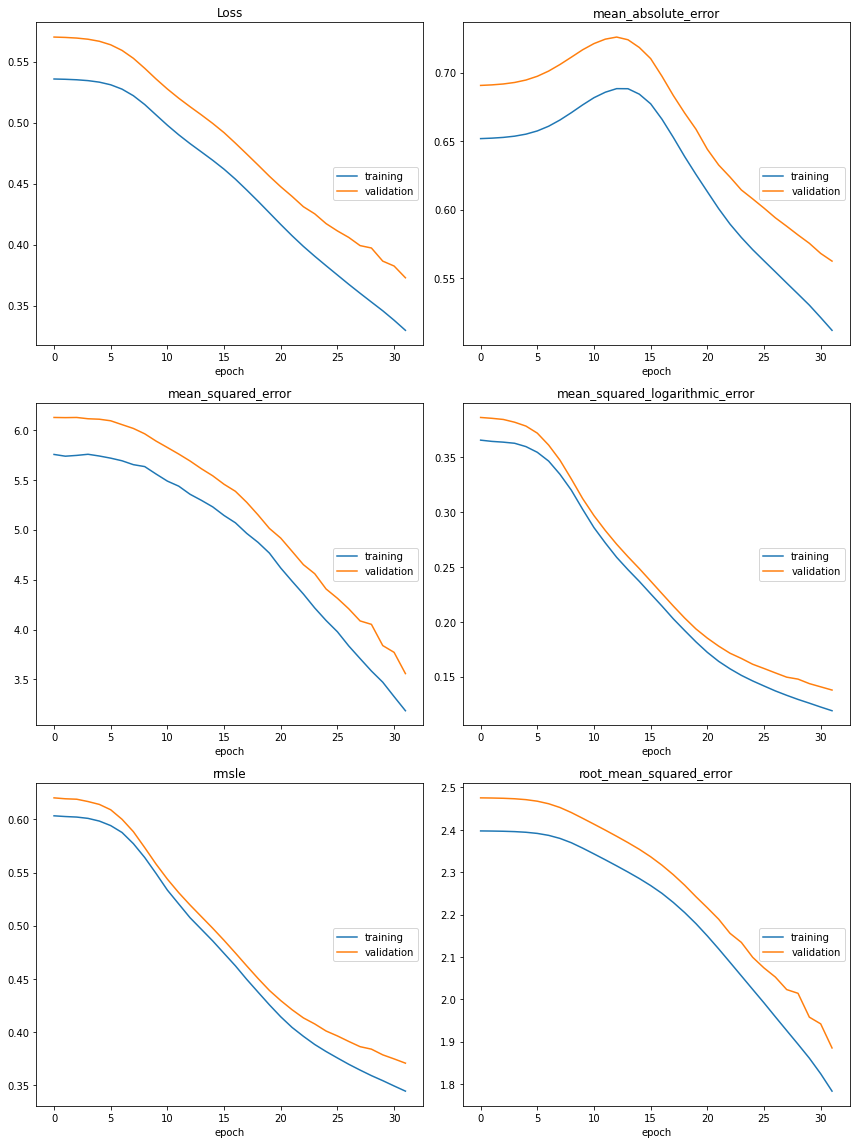

Loss
	training         	 (min:    0.330, max:    0.536, cur:    0.330)
	validation       	 (min:    0.373, max:    0.570, cur:    0.373)
mean_absolute_error
	training         	 (min:    0.512, max:    0.688, cur:    0.512)
	validation       	 (min:    0.562, max:    0.726, cur:    0.562)
mean_squared_error
	training         	 (min:    3.186, max:    5.755, cur:    3.186)
	validation       	 (min:    3.558, max:    6.124, cur:    3.558)
mean_squared_logarithmic_error
	training         	 (min:    0.119, max:    0.366, cur:    0.119)
	validation       	 (min:    0.138, max:    0.387, cur:    0.138)
rmsle
	training         	 (min:    0.344, max:    0.603, cur:    0.344)
	validation       	 (min:    0.371, max:    0.620, cur:    0.371)
root_mean_squared_error
	training         	 (min:    1.783, max:    2.397, cur:    1.783)
	validation       	 (min:    1.885, max:    2.475, cur:    1.885)
137/137 - 12s - loss: 0.3297 - mean_squared_logarithmic_error: 0.1188 - mean_squared_error: 3.1862 - me

KeyboardInterrupt: 

In [16]:
model = tf.keras.Sequential([
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
    Reshape([OUT_STEPS, num_features])
])
history = compile_and_fit(model, window, should_stop=True, max_epochs=100, lr_schedule_fn=(lambda epoch: 1e-6 * 10**(epoch/10))) # 5-8

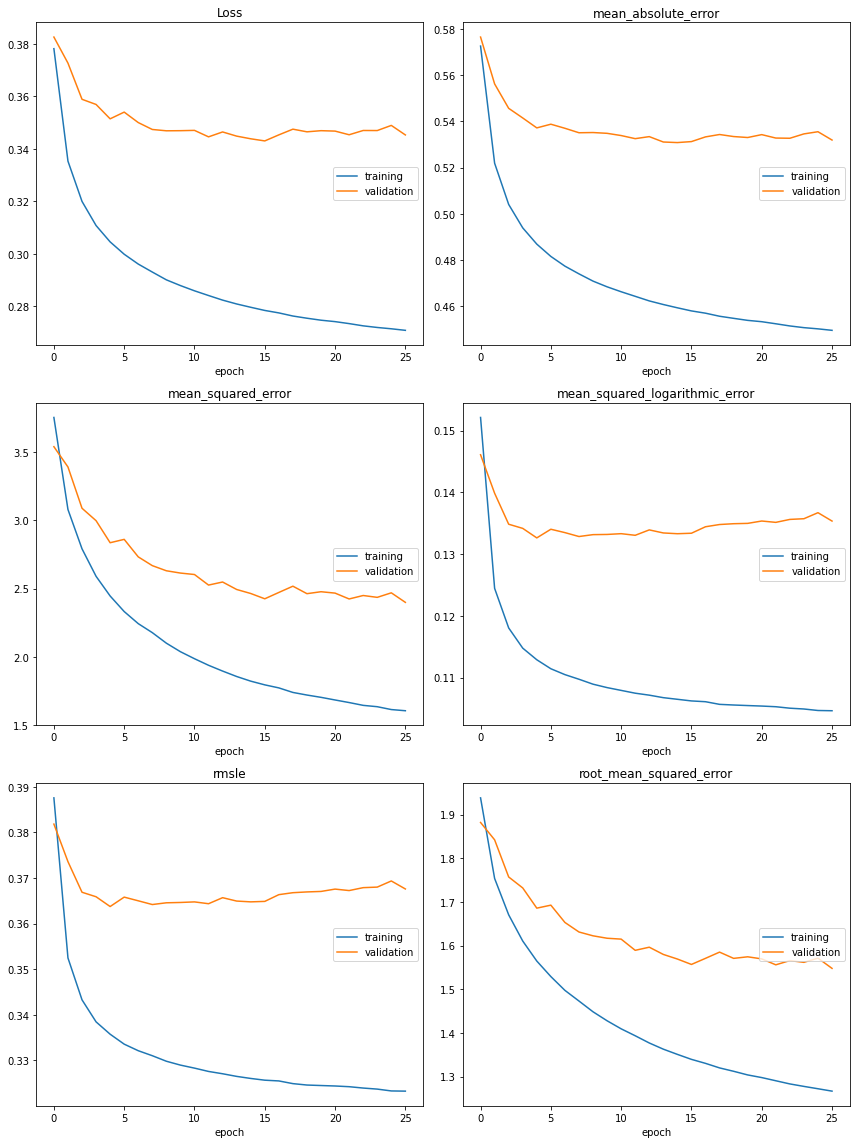

Loss
	training         	 (min:    0.271, max:    0.378, cur:    0.271)
	validation       	 (min:    0.343, max:    0.383, cur:    0.345)
mean_absolute_error
	training         	 (min:    0.450, max:    0.573, cur:    0.450)
	validation       	 (min:    0.531, max:    0.576, cur:    0.532)
mean_squared_error
	training         	 (min:    1.606, max:    3.754, cur:    1.606)
	validation       	 (min:    2.399, max:    3.540, cur:    2.399)
mean_squared_logarithmic_error
	training         	 (min:    0.105, max:    0.152, cur:    0.105)
	validation       	 (min:    0.133, max:    0.146, cur:    0.135)
rmsle
	training         	 (min:    0.323, max:    0.388, cur:    0.323)
	validation       	 (min:    0.364, max:    0.382, cur:    0.368)
root_mean_squared_error
	training         	 (min:    1.267, max:    1.938, cur:    1.267)
	validation       	 (min:    1.548, max:    1.882, cur:    1.548)
137/137 - 12s - loss: 0.2709 - mean_squared_logarithmic_error: 0.1046 - mean_squared_error: 1.6057 - me

In [17]:
model = tf.keras.Sequential([
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
    Reshape([OUT_STEPS, num_features])
])
history = compile_and_fit(model, window, lr=0.00000398, should_stop=True, max_epochs=100, tensorboard=True)
